# Proyecto

**Objetivo del Proyecto :** Análisis comparativo de algoritmos de clasificación, basados en lenguaje máquina, para la predicción de bancarrota, según datos financieros.

**Conjunto De Datos A Utilizar :**  Taiwanese Bankruptcy Prediction Data Set -
https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

**Algoritmo :** XGBoost Classifier - 
https://xgboost.readthedocs.io/en/latest/

## Path definition

In [1]:
# Si se traba conectado a drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
% cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [1]:
% ls -lhtr

## Metodología


> **CRISP - DM**

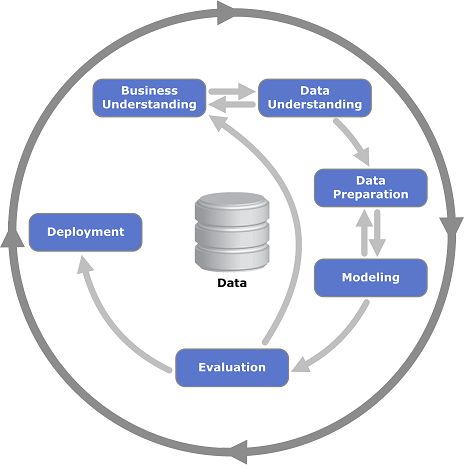




### **1. Carga de Modulos**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import re
import warnings
warnings.filterwarnings('ignore')

### **2. Lectura Inicial de datos**

#### 2.1. Carga de datos

In [10]:
# Se carga el dataset normalizado
dataset_normalizado = pd.read_pickle(os.path.join('results','dataset_normalizado.pkl'))
dataset_normalizado.shape

(6819, 95)

In [11]:
dataset_normalizado.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X95,flag
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,0.017106,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.009316,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,1.0
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,0.924712,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,1.0
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.158822,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,1.0
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.140392,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,1.0


#### 2.2. Buenas prácticas

In [ ]:
# Este paso fue trabajado en el script "02. Data Preparation.ipynb"

#### 2.3. Análisis Exploratorio de Datos (EDA)

In [ ]:
# Este paso fue trabajado en el script "01. Data Understanding .ipynb" y "02. Data Preparation.ipynb"

### **3. Tratamientos o Recodificacion de variables**

In [ ]:
# Este paso fue trabajado en el script "01. Data Understanding .ipynb" y "02. Data Preparation.ipynb"

#### 3.1. Completitud de los datos

In [ ]:
# Este paso fue trabajado en el script  "02. Data Preparation.ipynb"

#### 3.2. Recodificacion de los datos

In [ ]:
# Este paso fue trabajado en el script  "02. Data Preparation.ipynb"

### **4. Ingeniería y Selección de Variables**

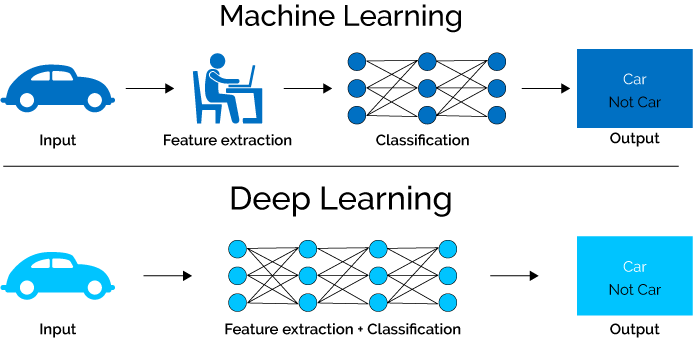

#### 4.1. Ingenieria de variables

In [ ]:
# Para este caso no se crearan más variables, dado que con las que se cuenta ya representan al comportamiento que se desea explicar

#### 4.2. Selección de variables

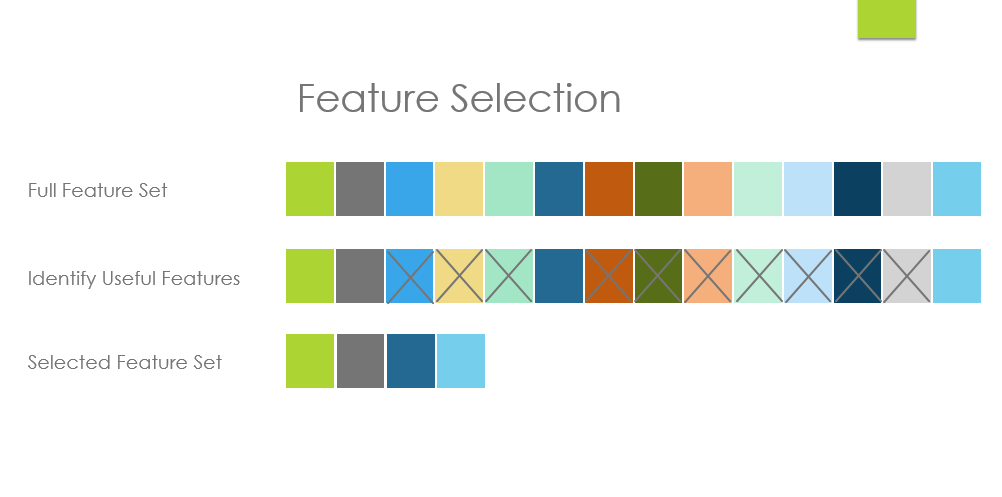

In [16]:
# Selección por Random Forest
forest = RandomForestClassifier(100, n_jobs=-1, oob_score=True)                                                   
X = dataset_normalizado.drop('flag',axis=1)
y = dataset_normalizado.flag                                               
forest.fit(X, y)                                                                  
importances = forest.feature_importances_ 

In [17]:
importances_ = pd.DataFrame({"columns":X.columns, "importances":importances}).sort_values("importances", ascending=False)

importances_.style.bar()

,columns,importances
29,X30,0.033060
89,X90,0.024167
18,X19,0.023785
39,X40,0.019988
92,X93,0.019953
42,X43,0.019410
36,X37,0.019272
17,X18,0.018440
91,X92,0.018350
35,X36,0.017186


### **5. Modelamiento de Datos o Creación del Algoritmo de ML**

#### 5.1. Particion Muestral

In [21]:
X = dataset_normalizado.drop('flag', axis = 1)
y = dataset_normalizado.flag

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.2) 

In [63]:
# Verificamos la distribuición del target
y.value_counts()/len(y)*100, y.value_counts()

(0.0    96.77372
 1.0     3.22628
 Name: flag, dtype: float64,
 0.0    6599
 1.0     220
 Name: flag, dtype: int64)

In [64]:
# Verificamos la distribuición del target de entrenamiento
y_train.value_counts()/len(y_train)*100, y_train.value_counts()

(0.0    96.773602
 1.0     3.226398
 Name: flag, dtype: float64,
 0.0    5279
 1.0     176
 Name: flag, dtype: int64)

In [65]:
# Verificamos la distribuición del target de validación
y_test.value_counts()/len(y_test)*100, y_test.value_counts()

(0.0    96.774194
 1.0     3.225806
 Name: flag, dtype: float64,
 0.0    1320
 1.0      44
 Name: flag, dtype: int64)

#### 5.2. Algoritmos Machine Learning

In [66]:
model_XGB = XGBClassifier(n_estimators=80, n_jobs=-1, max_depth=6)

In [67]:
model_XGB.fit(X_train, y_train)

[18:24:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred = model_XGB.predict(X_test)
# predictions = [round(value) for value in y_pred]
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 97.0674%


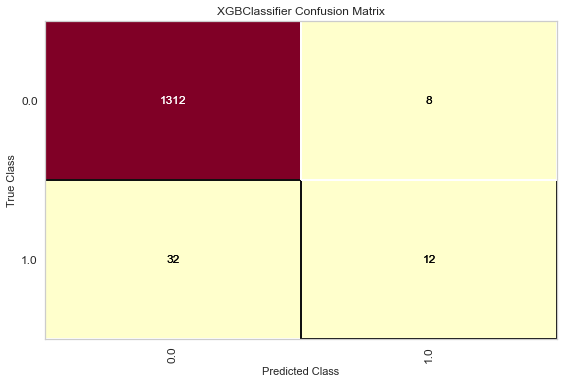

In [69]:
viz = ConfusionMatrix(model_XGB)
# viz.fit(X_train, y_train)
#viz.score(X_train, y_train)
viz.score(X_test, y_test)
viz.draw()
viz.finalize()

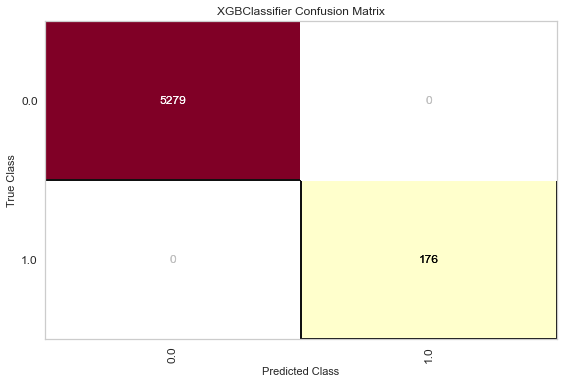

In [70]:
viz = ConfusionMatrix(model_XGB)
# viz.fit(X_train, y_train)
viz.score(X_train, y_train)
# viz.score(X_test, y_test)
viz.draw()
viz.finalize()

##### 5.2.1. Tuning - GridSearchCV

##### 5.2.2. Exportamos el mejor modelo